In [16]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns

### Reading Developers Survey Data

In [2]:
df = pd.read_csv('survey_results_public.csv')

### Data Structure 

In [6]:
df.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8


In [7]:
df.describe()

,Respondent,Age,CompTotal,ConvertedComp,WorkWeekHrs
count,64461.000000,45446.000000,3.482600e+04,3.475600e+04,41151.000000
mean,32554.079738,30.834111,3.190464e+242,1.037561e+05,40.782174
std,18967.442360,9.585392,inf,2.268853e+05,17.816383
min,1.000000,1.000000,0.000000e+00,0.000000e+00,1.000000
25%,16116.000000,24.000000,2.000000e+04,2.464800e+04,40.000000
50%,32231.000000,29.000000,6.300000e+04,5.404900e+04,40.000000
75%,49142.000000,35.000000,1.250000e+05,9.500000e+04,44.000000
max,65639.000000,279.000000,1.111111e+247,2.000000e+06,475.000000


In [5]:
df.shape

(64461, 61)

### Job Satisfaction 

Question 1: How earnings and weekly working hours contribute in the job statisfiction ? 

In [8]:
df.JobSat.value_counts(normalize= True)

Very satisfied                        0.323295
Slightly satisfied                    0.308227
Slightly dissatisfied                 0.157632
Neither satisfied nor dissatisfied    0.127959
Very dissatisfied                     0.082887
Name: JobSat, dtype: float64

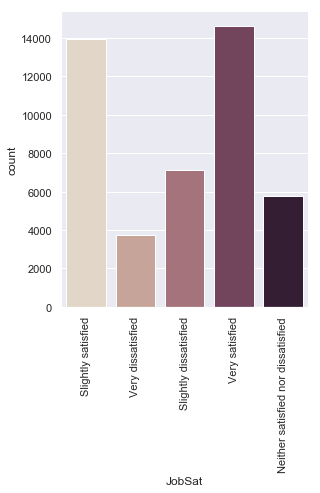

In [42]:
g = sns.catplot(x="JobSat", kind="count", palette="ch:.25", data=df);
g.set_xticklabels(rotation=90);

In [24]:
df.groupby('JobSat')['ConvertedComp'].mean()

JobSat
Neither satisfied nor dissatisfied     91748.645352
Slightly dissatisfied                  95691.666029
Slightly satisfied                     97914.980343
Very dissatisfied                      98499.218481
Very satisfied                        119251.118370
Name: ConvertedComp, dtype: float64

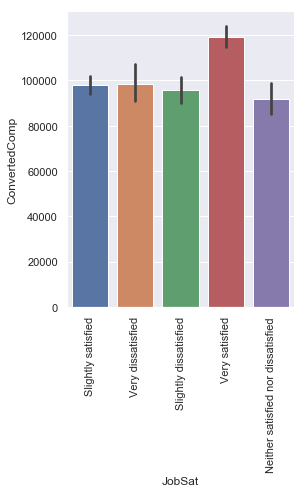

In [41]:
g= sns.catplot(x="JobSat", y="ConvertedComp", kind="bar", data=df)
g.set_xticklabels(rotation=90);

In [10]:
df.groupby('JobSat')['WorkWeekHrs'].mean() #No Significant difference notable

JobSat
Neither satisfied nor dissatisfied    40.205566
Slightly dissatisfied                 40.699093
Slightly satisfied                    40.606345
Very dissatisfied                     41.320876
Very satisfied                        41.075520
Name: WorkWeekHrs, dtype: float64

Question 2: Is there any correlation between the level of satisfaction about the current job and the seek for getting a new job?

In [49]:
df_sub1 = df[['JobSat' , 'JobSeek' , 'ConvertedComp' , 'WorkWeekHrs']].dropna(how = 'any' , axis = 0)
df_sub1.shape

(32997, 4)

In [59]:
df_sub1.JobSeek[df_sub1.JobSeek == 'I am actively looking for a job'] = 'Actively looking for a Job'
df_sub1.JobSeek[df_sub1.JobSeek == 'I am not interested in new job opportunities'] = 'Not interested in a new Job'
df_sub1.JobSeek[df_sub1.JobSeek == 'I’m not actively looking, but I am open to new opportunities'] = 'Open to a new Job'


c:\python27\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
c:\python27\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [60]:
df_sub1.JobSeek.value_counts(normalize = True) #Percentage of Job-Seeking status 

Open to a new Job              0.593296
Not interested in a new Job    0.277268
Actively looking for a Job     0.129436
Name: JobSeek, dtype: float64

In [61]:
JobSat_Seek = pd.crosstab(df_sub1.JobSat, df_sub1.JobSeek , normalize   = 'index') *100 # Percentage of job-seeking status according to Job statisfaction level
JobSat_Seek.round(1) 

JobSeek,Actively looking for a Job,Not interested in a new Job,Open to a new Job
JobSat,,,
Neither satisfied nor dissatisfied,18.6,10.0,71.3
Slightly dissatisfied,26.0,7.2,66.8
Slightly satisfied,8.7,20.3,71.1
Very dissatisfied,33.8,24.8,41.4
Very satisfied,3.3,52.0,44.6


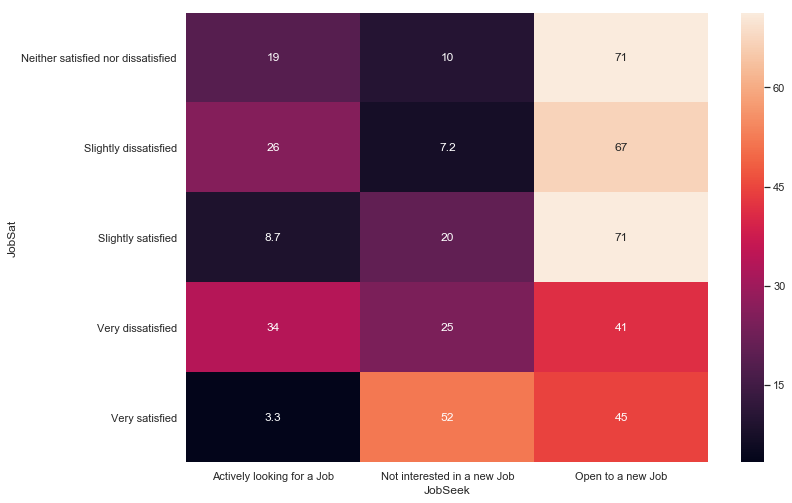

In [65]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(JobSat_Seek.round(1) , annot=True)

In [66]:
pd.crosstab(df_sub1.JobSat, df_sub1.JobSeek , normalize   = 'columns') *100

JobSeek,Actively looking for a Job,Not interested in a new Job,Open to a new Job
JobSat,,,
Neither satisfied nor dissatisfied,16.647155,4.175320,13.898963
Slightly dissatisfied,33.317724,4.295551,18.659652
Slightly satisfied,20.721143,22.658214,37.140522
Very dissatisfied,20.814797,7.148322,5.562650
Very satisfied,8.499181,61.722593,24.738213


Question 3: Does the annual salary average change according to the educational level and years of experience ?


In [141]:
df.EdLevel[df.EdLevel == 'Associate degree (A.A., A.S., etc.)'] = 'Associate Degree'
df.EdLevel[df.EdLevel == 'Bachelor’s degree (B.A., B.S., B.Eng., etc.)'] = 'Bachelor Degree'
df.EdLevel[df.EdLevel == 'I never completed any formal education'] = 'No Formal Education'
df.EdLevel[df.EdLevel == 'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)'] = 'Master  Degree'
df.EdLevel[df.EdLevel == 'Other doctoral degree (Ph.D., Ed.D., etc.)'] = 'Doctoral Degree'
df.EdLevel[df.EdLevel == 'Primary/elementary school'] = 'Primary School'
df.EdLevel[df.EdLevel == 'Professional degree (JD, MD, etc.)'] = 'Professional Degree'
df.EdLevel[df.EdLevel == 'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)'] = 'Secondary school'
df.EdLevel[df.EdLevel == 'Some college/university study without earning a degree'] = 'University without a degree'

c:\python27\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
c:\python27\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
c:\python27\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
c:\python27\lib\site-packages\ipykernel_launcher.py:4: Set

In [142]:
df.EdLevel.value_counts()

Bachelor Degree                26542
Master  Degree                 13112
University without a degree     7239
Secondary school                4771
Associate Degree                1843
Doctoral Degree                 1690
Primary School                   941
Professional Degree              800
No Formal Education              493
Name: EdLevel, dtype: int64

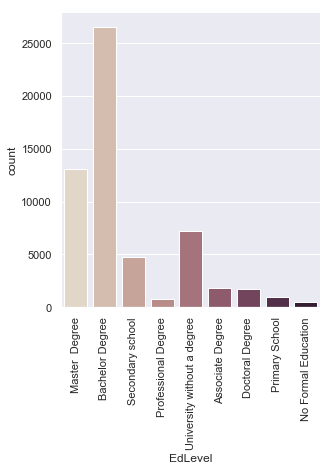

In [143]:
g = sns.catplot(x="EdLevel", kind="count", palette="ch:.25", data=df);
g.set_xticklabels(rotation=90);

In [144]:
df.groupby('EdLevel')['ConvertedComp'].mean()

EdLevel
Associate Degree               106815.832192
Bachelor Degree                107638.145312
Doctoral Degree                122849.059545
Master  Degree                 103104.775496
No Formal Education            104351.616883
Primary School                 114752.679739
Professional Degree             72062.004193
Secondary school                79067.561392
University without a degree     97895.641703
Name: ConvertedComp, dtype: float64

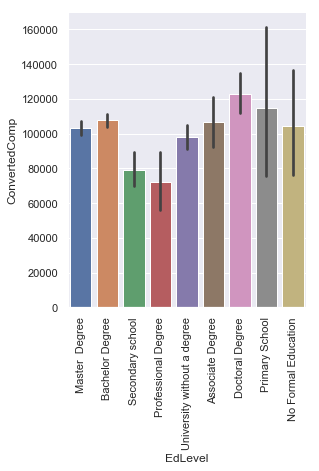

In [145]:
g= sns.catplot(x="EdLevel", y="ConvertedComp", kind="bar", data=df)
g.set_xticklabels(rotation=90);

In [146]:
df.YearCodeProCate = np.nan
#df.loc[(df['YearsCodePro']  == 'Less than 1 year') , 'YearsCodePro'] = 0 
#df.loc[(df['YearsCodePro']  == 'More than 50 years') , 'YearsCodePro'] = 50 
df['YearsCodePro'] = df['YearsCodePro'].apply(pd.to_numeric)
df.YearCodeProCate[df.YearsCodePro <= 1] = 'One year by maximum'
df.YearCodeProCate[(df.YearsCodePro >1) & (df.YearsCodePro <= 3)] = 'Between 1-3 Years'
df.YearCodeProCate[(df.YearsCodePro >3) & (df.YearsCodePro <= 5)] = 'Between 3-5 Years'
df.YearCodeProCate[(df.YearsCodePro >5) & (df.YearsCodePro <= 10)] = 'Between 5-10 Years'
df.YearCodeProCate[(df.YearsCodePro >10) & (df.YearsCodePro <= 20)] = 'Between 10-20 Years'
df.YearCodeProCate[(df.YearsCodePro >20) & (df.YearsCodePro <= 30)] = 'Between 20-30 Years'
df.YearCodeProCate[(df.YearsCodePro >30) & (df.YearsCodePro <= 40)] = 'Between 30-40 Years'
df.YearCodeProCate[(df.YearsCodePro >40) & (df.YearsCodePro <= 50)] = 'Between 40-50 Years'
df.YearCodeProCate[(df.YearsCodePro >50) ] = 'More than 50 Years'



c:\python27\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
c:\python27\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
c:\python27\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
c:\python27\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the d

In [147]:
df.YearCodeProCate.value_counts()

Between 5-10 Years     11171
Between 1-3 Years       9629
Between 10-20 Years     9021
Between 3-5 Years       7694
One year by maximum     4992
Between 20-30 Years     2847
Between 30-40 Years      834
Between 40-50 Years      161
Name: YearCodeProCate, dtype: int64

In [148]:
df.groupby('YearCodeProCate')['ConvertedComp'].mean() #Average annual salary according to years of experince 

YearCodeProCate
Between 1-3 Years       76909.673576
Between 10-20 Years    131942.749274
Between 20-30 Years    154408.748689
Between 3-5 Years       91311.457528
Between 30-40 Years    152316.811189
Between 40-50 Years    206768.947917
Between 5-10 Years     109008.957771
One year by maximum     68443.907814
Name: ConvertedComp, dtype: float64

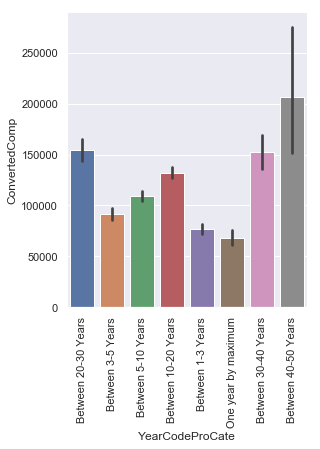

In [149]:
g= sns.catplot(x="YearCodeProCate", y="ConvertedComp", kind="bar", data=df)
g.set_xticklabels(rotation=90);

In [150]:
Sal_Edu_YearPro = df.groupby(['EdLevel' , 'YearCodeProCate'])['ConvertedComp'].mean().round(1)
Sal_Edu_YearPro = pd.DataFrame(Sal_Edu_YearPro).reset_index()
Sal_Edu_YearPro = Sal_Edu_YearPro.pivot("EdLevel", "YearCodeProCate", "ConvertedComp")
Sal_Edu_YearPro

YearCodeProCate,Between 1-3 Years,Between 10-20 Years,Between 20-30 Years,Between 3-5 Years,Between 30-40 Years,Between 40-50 Years,Between 5-10 Years,One year by maximum
EdLevel,,,,,,,,
Associate Degree,117386.6,137185.8,150703.4,83238.3,139140.1,131793.0,94791.4,56815.7
Bachelor Degree,74218.0,143408.2,182814.7,96632.9,151956.2,195488.4,120490.1,70640.3
Doctoral Degree,128367.2,136678.7,136179.0,88584.0,143784.3,181350.7,118371.5,91067.3
Master Degree,75987.7,124104.9,135408.2,87066.4,170414.2,170378.3,105218.2,80261.3
No Formal Education,65582.6,109128.0,200296.6,61181.9,385915.2,NaN,96934.6,26475.6
Primary School,86992.1,132835.0,165482.5,46650.6,104659.0,2000000.0,46834.8,154990.4
Professional Degree,41607.3,73503.0,140155.8,63720.1,123010.5,115000.0,69878.6,77087.9
Secondary school,56310.6,114217.0,137325.6,69855.5,179711.9,NaN,73267.5,55749.4
University without a degree,86973.9,123737.5,129526.3,96924.3,121159.3,141453.6,90407.7,49533.0


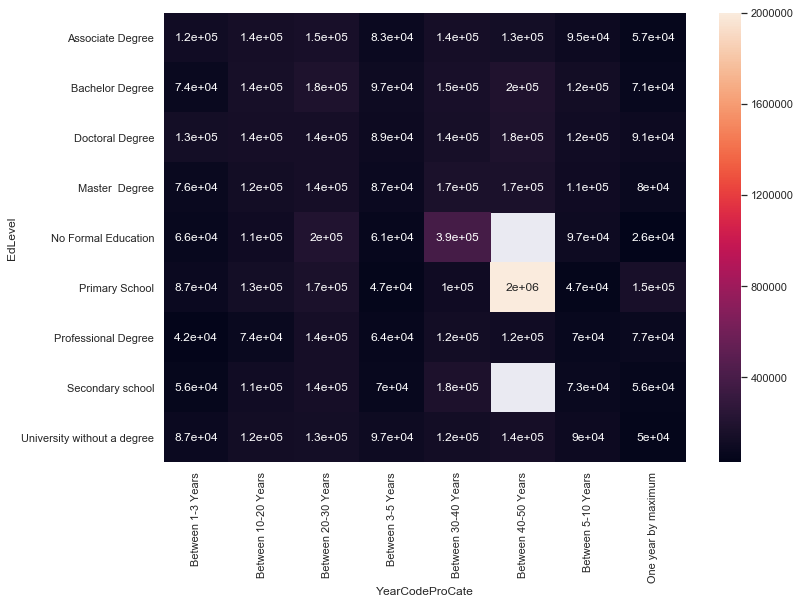

In [139]:
sns.heatmap(Sal_Edu_YearPro , annot= True);

In [78]:
pd.crosstab(df.NEWEdImpt, df.EdLevel , normalize   = 'columns') *100 

EdLevel,Associate Degree,Bachelor Degree,Doctoral Degree,Master Degree,Primary School,Professional Degree,Secondary school,University without a degree
NEWEdImpt,,,,,,,,
Critically important,4.370180,9.265367,35.337880,12.890817,6.089744,11.715481,2.854554,2.400289
Fairly important,23.971722,29.141144,18.846869,28.237027,13.141026,24.686192,14.952424,17.740480
Not at all important/not necessary,25.385604,11.989719,6.943583,7.546243,45.512821,15.341702,45.038514,37.592492
Somewhat important,33.033419,23.958021,10.167390,18.800131,20.512821,19.665272,27.775261,32.449016
Very important,13.239075,25.645749,28.704278,32.525782,14.743590,28.591353,9.379248,9.817722
